# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from pprint import pprint
# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count (i.e above 500)
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = ["imperial"]
query_url = f"{url}appid={api_key}&units=IMPERIAL&q="


In [ ]:
# Loop through the list of cities and print city and city id for each
print("Open Weather Data, City Log")
print("-------------------------------------")
for city in cities:
    response = requests.get(query_url + city).json()
    CityID = response.get("id")
    CityName = response.get("name")
    if CityID: 
        print(f"City: {CityName}, City Number: {CityID}")
    else:
        print(f"No data for {CityName}")


Open Weather Data, City Log
-------------------------------------
City: Hilo, City Number: 5855927
City: Vaini, City Number: 1273574
City: Kenai, City Number: 5866063
City: Mataura, City Number: 6201424
City: Lebu, City Number: 344979
City: Kruisfontein, City Number: 986717
City: Buy, City Number: 570508
City: Qaanaaq, City Number: 3831208
City: Sao Felix do Xingu, City Number: 3388847
City: Bethel, City Number: 5880568
City: Khatanga, City Number: 2022572
City: Vila Franca do Campo, City Number: 3372472
City: Punta Arenas, City Number: 3874787
City: Bambous Virieux, City Number: 1106677
City: Dikson, City Number: 1507390
City: Hobart, City Number: 2163355
City: Ilulissat, City Number: 3423146
City: Innisfail, City Number: 5983430
City: Severo-Kurilsk, City Number: 2121385
City: Yamada, City Number: 1849876
City: Ponta Delgada, City Number: 3372783
City: Alofi, City Number: 4036284
City: Gayny, City Number: 561698
City: Albany, City Number: 5106834
No data for None
City: Mamallapuram, 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create Lists to hold data
cityid = []
cityname = []
Cloudiness = []
Lat = []
Lng = []
Max_Temp = []
Wind_Speed = []
Date = []
Humidity = []

#Loop through cities and pull out information. Use Try/Except due to KeyError and replace with N/A
for city in cities:
    response = requests.get(query_url + city).json()
    try:
        cityname.append(response['name'])
        cityid.append(response['id'])
        Lat.append(response['coord']['lat'])
        Lng.append(response['coord']['lon'])
        Max_Temp.append(response['main']['temp'])
        Wind_Speed.append(response['wind']['speed'])
        Date.append(response['dt'])
        Humidity.append(response['main']['humidity'])
        Cloudiness.append(response['clouds']['all'])

    except KeyError:
        cityname.append(np.nan)
        cityid.append(np.nan)
        Lat.append(np.nan)
        Lng.append(np.nan)
        Max_Temp.append(np.nan)
        Wind_Speed.append(np.nan)
        Date.append(np.nan)
        Humidity.append(np.nan)   
        Cloudiness.append(0)

weather_dict = {
    "City": cityname,
    "City Number": cityid,
    "Latitude": Lat,
    "Longitude": Lng,
    "Temp": Max_Temp,
    "Wind Speed": Wind_Speed,
    "Cloudiness": Cloudiness,
    "Humidity": Humidity,
    "Date": Date}

weather_data = pd.DataFrame(weather_dict)

# Remove any cities that have NaN values
weather_data = weather_data.dropna(how='any')



In [5]:
#Display Data Frame
#export to csv
weather_data.head()

,City,City Number,Latitude,Longitude,Temp,Wind Speed,Cloudiness,Humidity,Date
0,Sangar,2017215.0,63.92,127.47,-37.26,1.92,0,0.0,1.546639e+09
1,Faya,110690.0,18.39,42.45,58.14,4.70,5,41.0,1.546636e+09
3,Punta Arenas,3874787.0,-53.16,-70.91,50.00,27.51,75,93.0,1.546636e+09
4,Grand Gaube,934479.0,-20.01,57.66,80.60,3.36,40,83.0,1.546636e+09
5,Kapaa,5848280.0,22.08,-159.32,78.57,13.87,90,64.0,1.546635e+09


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

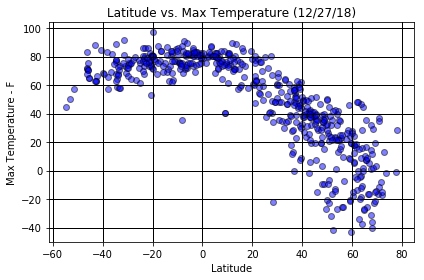

In [6]:
#Plot in a scatter plot
plt.scatter(Lat, Max_Temp, alpha = 0.5,
            marker ='o', facecolors ="blue", edgecolors='black', label="Cities")

# TITLE
plt.title("Latitude vs. Max Temperature (12/27/18)")
# LABELS
plt.xlabel("Latitude")
plt.ylabel("Max Temperature - F")

#RESIZING
plt.tight_layout()
plt.grid(color='black', linestyle='-', linewidth=1)


#### Latitude vs. Humidity Plot

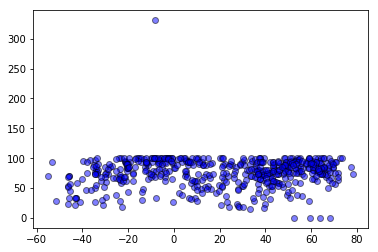

In [7]:
plt.scatter(Lat, Humidity, alpha = 0.5,
            marker ='o', facecolors ="blue", edgecolors='black', label="Cities")

#### Latitude vs. Cloudiness Plot

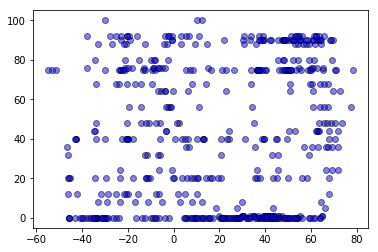

In [8]:
plt.scatter(Lat, Cloudiness, alpha = 0.5,
            marker ='o', facecolors ="blue", edgecolors='black', label="Cities")

#### Latitude vs. Wind Speed Plot

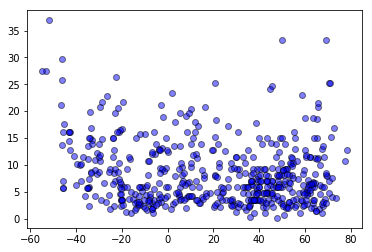

In [9]:
plt.scatter(Lat, Wind_Speed, alpha = 0.5,
            marker ='o', facecolors ="blue", edgecolors='black', label="Cities")